**Question 1**
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

We have matrices of size (n, k) and (k, m).

If we mutltiply matrix by row x column multiplication, the elements of resultant matrix can be calculated as:

Each element of resultant will be obtained by k multiplications followed by addition of these k multiplications.
Therefore, for each element of the resultant matrix, there will be k multiplications and k-1 additions.
For each element we perform k multiplications and k−1 additions.
There are n×m elements in the resulting matrix.

Thus, the total number of multiplications will be **n*m*k**

and the total number of additions will be **n*m*(k-1)**



**Question 2**
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
# Matrix multiplication  using lists of lists

def matrix_multiply_list_of_lists(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])

    # Initialize result matrix C with zeros
    C = [[0 for _ in range(m)] for _ in range(n)]

    # Perform matrix multiplication
    for i in range(n):
        for j in range(m):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]

    return C

In [3]:
# Matrix multiplication using numpy

import numpy as np

def matrix_multiply_numpy(A, B):
    return np.dot(A, B)


In [47]:
import time

# Example matrices
A = np.random.randint(1,5,(256,128))
B = np.random.randint(1,5,(128,64))
# Timing for list of lists multiplication
start_time = time.time()
result_list_of_lists = matrix_multiply_list_of_lists(A, B)
end_time = time.time()
# print("List of Lists Result:", result_list_of_lists)
print("Time taken using List of Lists:", end_time - start_time)

# Timing for NumPy multiplication
A_np = np.array(A)
B_np = np.array(B)
start_time = time.time()
result_numpy = matrix_multiply_numpy(A_np, B_np)
end_time = time.time()
# print("NumPy Result:", result_numpy)
print("Time taken using NumPy:", end_time - start_time)

Time taken using List of Lists: 0.827064037322998
Time taken using NumPy: 0.0


NumPy is generally faster for matrix operations due to its optimized and vectorized implementations.


**Question 3**
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Max element in an unsorted array can be found out in a single pass by simply comparing the values while iterating the array and continuously udpating the max value. The value present in the end the will be the max element.

Similarly, the second highest element in an unsorted array can be found in two passes in which the first pass will give the max element in the array and the second pass will output the second max element.

In [13]:
# Finding max element of an unsorted array in one pass
def find_max(arr):
  max_ele = 0
  for i in arr:
    if(i > max_ele):
      max_ele = i
  return max_ele

arr = [3,5,2,3,4,9,7,8,0,1]
print("Max element present in the array is:", find_max(arr))

Max element present in the array is: 9


In [14]:
# Finding second max element of an unsorted array in two pass
def find_sec_max(arr):
  max_ele = 0
  for i in arr:
    if(i > max_ele):
      max_ele = i
  sec_max = 0
  for i in arr:
    if(i > sec_max and i < max_ele):
      sec_max = i
  return sec_max
arr = [3,5,2,3,4,9,7,8,0,1]
print("Second Max element present in the array is:",find_sec_max(arr))

Second Max element present in the array is: 8


Now, if we try to find the median of the unsorted array in this way, time complexity would be $$ {O(n^2)} $$

The better method would be to first sort the array and then find the median. The time complexity of this method would be $$ {O(nlog(n))} $$



In [20]:
# Finding the median element using sort
import time
arr = [3,11,5,2,1,4,6,7,8]
start = time.time()
arr.sort()
x = len(arr)
if(x%2==1):
  median_idx = (x + 1)//2 - 1
  print(arr[median_idx])
end = time.time()
print("Time taken in order to calculate median after using sorting techninque:",(end-start) * 10**3, "ms")

5
Time taken in order to calculate median after using sorting techninque: 6.499767303466797 ms


In [21]:
# Finding the median element using numpy
import time
arr = [3,11,5,2,1,4,6,7,8]
start = time.time()
print(np.median(arr))
end = time.time()

print("Time taken in order to calculate median using inbuilt function:",(end-start) * 10**3, "ms")

5.0
Time taken in order to calculate median using inbuilt function: 0.0 ms


**Question 4**

Given $$ {f(x,y) = x^2y + y^3sin(x)} $$

The gradient with respect to x will be 

$$ {2xy+y^3\cos(x)} $$

Similarly, the gradient with respect to y will be
$$ {x^2+3y^2\sin (x)} $$

**Question 5**

In [26]:
import jax
import jax.numpy as jnp

# Define the function
def my_function(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Define the gradient function using JAX
grad_my_function = jax.grad(my_function, argnums=(0, 1))

# Test the gradient with random values
random_x = 2.0
random_y = 3.0

gradient_x, gradient_y = grad_my_function(random_x, random_y)

# Display results
print(f"Analytical Gradient with respect to x: {2 * random_x * random_y + random_y**3 * jnp.cos(random_x)}")
print(f"JAX Gradient with respect to x: {gradient_x}")

print(f"Analytical Gradient with respect to y: {random_x**2 + 3 * random_y**2 * jnp.sin(random_x)}")
print(f"JAX Gradient with respect to y: {gradient_y}")


Analytical Gradient with respect to x: 0.7640352249145508
JAX Gradient with respect to x: 0.7640352249145508
Analytical Gradient with respect to y: 28.551029205322266
JAX Gradient with respect to y: 28.551029205322266


**Question 6**

In [27]:
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient
gradient_x = sp.diff(f, x)
gradient_y = sp.diff(f, y)

# Display the symbolic gradient expressions
print(f"Analytical Gradient with respect to x: {gradient_x}")
print(f"Analytical Gradient with respect to y: {gradient_y}")


Analytical Gradient with respect to x: 2*x*y + y**3*cos(x)
Analytical Gradient with respect to y: x**2 + 3*y**2*sin(x)


**Question 7**

In [29]:
Dict = {'2022': {'Branch 1':{'Roll NO':1,'Name':'N','Marks':{'Maths': 100,'English': 70}},
                 'Branch 2':{'Roll NO':1,'Name':'A','Marks':{'Maths': 90,'English': 75}}},
        '2023':{'Branch 1':{'Roll NO':1,'Name':'B','Marks':{'Maths': 85,'English': 85}},
                 'Branch 2':{'Roll NO':1,'Name':'C','Marks':{'Maths': 95,'English': 75}}},
        '2024':{'Branch 1':{'Roll NO':1,'Name':'D','Marks':{'Maths': 100,'English': 90},'Roll NO':2,'Name':'G','Marks':{'Maths': 65,'English': 95}},
                 'Branch 2':{'Roll NO':1,'Name':'E','Marks':{'Maths': 90,'English': 70}}},
        '2025':{'Branch 1':None,'Branch 2':None},}
print(Dict)

{'2022': {'Branch 1': {'Roll NO': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {'Roll NO': 1, 'Name': 'A', 'Marks': {'Maths': 90, 'English': 75}}}, '2023': {'Branch 1': {'Roll NO': 1, 'Name': 'B', 'Marks': {'Maths': 85, 'English': 85}}, 'Branch 2': {'Roll NO': 1, 'Name': 'C', 'Marks': {'Maths': 95, 'English': 75}}}, '2024': {'Branch 1': {'Roll NO': 2, 'Name': 'G', 'Marks': {'Maths': 65, 'English': 95}}, 'Branch 2': {'Roll NO': 1, 'Name': 'E', 'Marks': {'Maths': 90, 'English': 70}}}, '2025': {'Branch 1': None, 'Branch 2': None}}


**Question 9**
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


In [48]:
x = np.linspace(0.5,100,200)
# print(x)

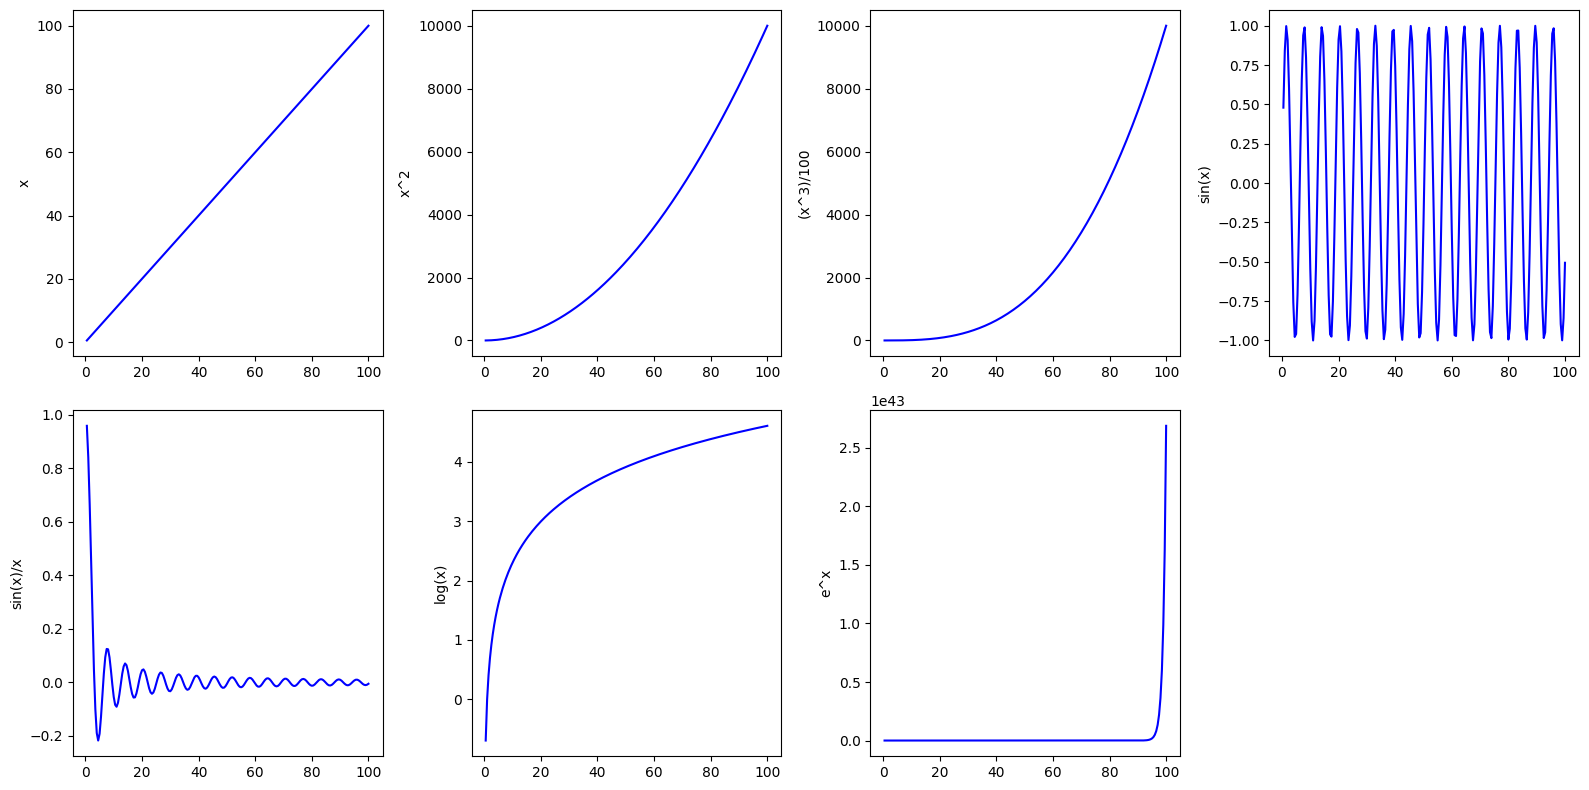

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

y = x
plt.subplot(2,4,1)
plt.plot(x,y, 'blue')
plt.ylabel("x")

y = x**2
plt.subplot(2,4,2)
plt.plot(x,y, 'blue')
plt.ylabel("x^2")

y = (x**3)/100
plt.subplot(2,4,3)
plt.plot(x,y, 'blue')
plt.ylabel("(x^3)/100")

y = np.sin(x)
plt.subplot(2,4,4)
plt.plot(x,y, 'blue')
plt.ylabel("sin(x)")

y = np.sin(x)/x
plt.subplot(2,4,5)
plt.plot(x,y, 'blue')
plt.ylabel("sin(x)/x")

y = np.log(x)
plt.subplot(2,4,6)
plt.plot(x,y, 'blue')
plt.ylabel("log(x)")

y = np.exp(x)
plt.subplot(2,4,7)
plt.plot(x,y, 'blue')
plt.ylabel("e^x")

plt.tight_layout()
plt.show()

**Question 10**

In [44]:
import numpy as np
import pandas as pd

# Generating a 20x5 matrix with random numbers uniformly drawn from the range [1, 2]
random_matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a dataframe with columns named "a", "b", "c", "d", "e"
df = pd.DataFrame(random_matrix, columns=["a", "b", "c", "d", "e"])

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

# Display the dataframe
print("DataFrame:")
print(df)

# Display results
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.069516  1.400413  1.997478  1.927886  1.725930
1   1.944410  1.719137  1.179858  1.187821  1.679341
2   1.417708  1.572264  1.081854  1.541451  1.063310
3   1.516240  1.973696  1.228374  1.967646  1.769914
4   1.798522  1.780910  1.684072  1.506681  1.941394
5   1.304365  1.908563  1.007264  1.450775  1.253468
6   1.125105  1.430534  1.186036  1.071037  1.573534
7   1.770008  1.759854  1.693126  1.960251  1.740789
8   1.968809  1.875291  1.293281  1.725603  1.231781
9   1.580038  1.692817  1.936371  1.878931  1.717242
10  1.337303  1.624432  1.617431  1.892192  1.447482
11  1.667703  1.713482  1.022282  1.025128  1.379508
12  1.419370  1.918488  1.487237  1.120065  1.405504
13  1.993653  1.883215  1.142361  1.952746  1.935364
14  1.089000  1.944142  1.290468  1.287907  1.640177
15  1.136647  1.624845  1.748024  1.875752  1.513880
16  1.929641  1.474887  1.238160  1.523612  1.731665
17  1.711401  1.933193  1.700394  1

**Question 11**

In [45]:
# Adding a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Adding seventh column g
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print(df.head())
print('\n')
# Counting no. of rows with Less than 8 value
count = len(df[df['g'] == 'LT8'])

print("Number of rows with LT8:",count)
print('\n')

# Find the standard deviation of column "f" for "LT8" and "GT8" rows
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("\nNumber of rows where the value in column 'g' is 'LT8':", count)
print("Standard deviation of column 'f' for 'LT8' rows:", std_lt8)
print("Standard deviation of column 'f' for 'GT8' rows:", std_gt8)

          a         b         c         d         e         f    g
0  1.069516  1.400413  1.997478  1.927886  1.725930  8.121222  GT8
1  1.944410  1.719137  1.179858  1.187821  1.679341  7.710567  LT8
2  1.417708  1.572264  1.081854  1.541451  1.063310  6.676587  LT8
3  1.516240  1.973696  1.228374  1.967646  1.769914  8.455870  GT8
4  1.798522  1.780910  1.684072  1.506681  1.941394  8.711578  GT8


Number of rows with LT8: 12



Number of rows where the value in column 'g' is 'LT8': 12
Standard deviation of column 'f' for 'LT8' rows: 0.6019188694831779
Standard deviation of column 'f' for 'GT8' rows: 0.3315419174096786


**Question 12**

In this example, we have a 2x3 matrix and a scalar. The scalar is added to each element of the matrix using the + operator. Broadcasting automatically extends the scalar to a 2x3 matrix, allowing the addition operation to be performed element-wise.

In [36]:
import numpy as np

# Create a 2x3 matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

# Add a scalar to each element of the matrix
scalar = 10

# Broadcasting: NumPy automatically extends the scalar to a 2x3 matrix
result = matrix + scalar

# Display the original matrix, scalar, and the result
print("Original Matrix:")
print(matrix)
print("\nScalar:")
print(scalar)
print("\nResult after Broadcasting:")
print(result)


Original Matrix:
[[1 2 3]
 [4 5 6]]

Scalar:
10

Result after Broadcasting:
[[11 12 13]
 [14 15 16]]


**Question 13**

In [46]:
import numpy as np

def custom_argmin(arr):
    # Check if the array is empty
    if len(arr) == 0:
        exit()

    min_value = arr[0]
    min_index = 0

    for i, value in enumerate(arr):
        if value < min_value:
            min_value = value
            min_index = i

    return min_index

# Example usage:
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
result = custom_argmin(arr)

# Verify the result using np.argmin
np_argmin_result = np.argmin(arr)

# Display results
print("Custom argmin result:", result)
print("np.argmin result:", np_argmin_result)


Custom argmin result: 1
np.argmin result: 1
